### Required Packages

In [9]:
import numpy as np
from numpy.linalg import pinv
import matplotlib.pyplot as plt

#### Find SVD for the matrix A then find it's Pseeudoinverse:
$$\begin{bmatrix} 7 & 2 \\ 3 & 4 \\ 5 & 3 \end{bmatrix}$$

In [10]:
def pseudo_inv(A):
    U, D, Vt = np.linalg.svd(A)

    D_plus = np.zeros((A.shape[0], A.shape[1])).T
    D_plus[:D.shape[0], :D.shape[0]] = np.linalg.inv(np.diag(D))

    A_plus = Vt.T.dot(D_plus).dot(U.T)
    
    return A_plus

In [11]:
A = np.array([ [7, 2], [3, 4], [5, 3] ])
A_plus = pseudo_inv(A)

print(A_plus)

[[ 0.16666667 -0.10606061  0.03030303]
 [-0.16666667  0.28787879  0.06060606]]


### Use np.linalg.pinv(A) and compare the results

In [12]:
np.linalg.pinv(A)

array([[ 0.16666667, -0.10606061,  0.03030303],
       [-0.16666667,  0.28787879,  0.06060606]])

### Multiply A+ and  A. See if the result is close to the Identity matrix

In [13]:
A_plus@A

array([[1.00000000e+00, 2.70616862e-16],
       [2.28983499e-16, 1.00000000e+00]])

### Multiply A and A+. Notice the result
- A difference with the real inverse is that A+A is approximate I. However AA+ is not

In [14]:
A@A_plus

array([[ 0.83333333, -0.16666667,  0.33333333],
       [-0.16666667,  0.83333333,  0.33333333],
       [ 0.33333333,  0.33333333,  0.33333333]])

### Using the pseudoinverse to solve a overdetermined system of linear equations
- In general there is no solution to overdetermined systems.
- In the following picture, there is no point at the intersection of the three lines corresponding to three equations:

### Use pseudoinverse to find the approximate solution of the following system of linear equations:
#### -2x1 - x2 = -2 , 4x1 - x2 = -8 , -x1 - x2 =-2

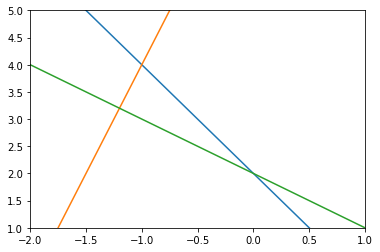

In [15]:
x1 = np.linspace(-5, 5, 1000)
x2_1 = -2*x1 + 2
x2_2 = 4*x1 + 8
x2_3 = -1*x1 + 2

plt.plot(x1, x2_1)
plt.plot(x1, x2_2)
plt.plot(x1, x2_3)
plt.xlim(-2., 1)
plt.ylim(1, 5)
plt.show()

In [16]:
A = np.array([[-2, -1], [4, -1], [-1, -1]])
A_plus = np.linalg.pinv(A)
A_plus

array([[-0.11290323,  0.17741935, -0.06451613],
       [-0.37096774, -0.27419355, -0.35483871]])

In [17]:
b = np.array([[-2], [-8], [-2]])
res = A_plus @ b
res

array([[-1.06451613],
       [ 3.64516129]])

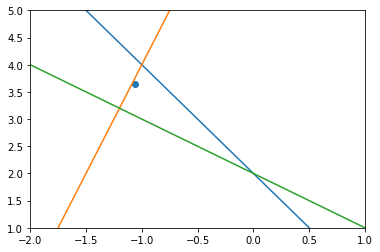

In [18]:
plt.plot(x1, x2_1)
plt.plot(x1, x2_2)
plt.plot(x1, x2_3)
plt.xlim(-2., 1)
plt.ylim(1, 5)

plt.scatter(res[0], res[1])

plt.show()